In [142]:
import numpy as np
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
import scipy

In [143]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


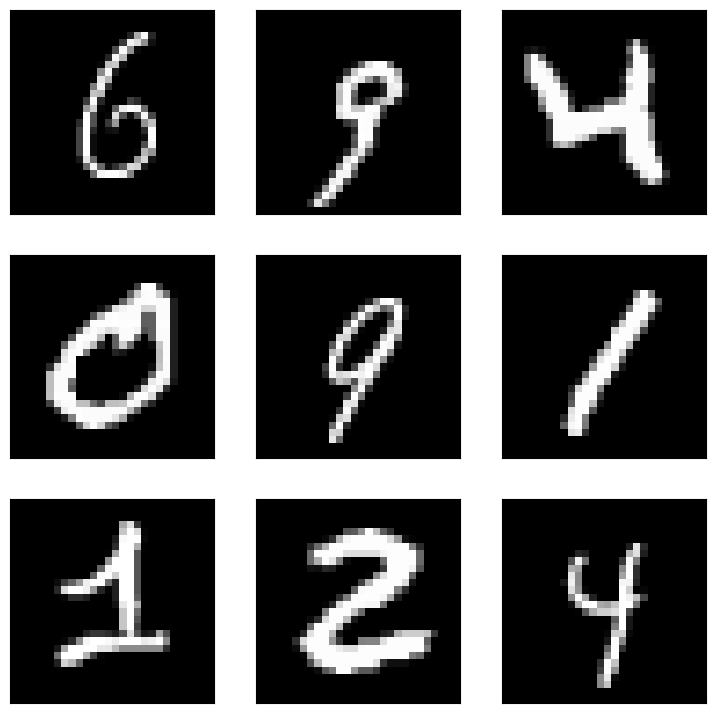

In [144]:
# Figure size
plt.figure(figsize=(9,9))

# Subplot 
for i in range(9):
    img = np.asarray(x_train[i+18,:].reshape((28,28))/255);
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(img, cmap='gray')
    
plt.show()

In [180]:
datagen = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=[0.9,3.5],
    fill_mode='nearest'
)
aug_iter = datagen.flow(x_train.reshape(-1, 28, 28, 1))

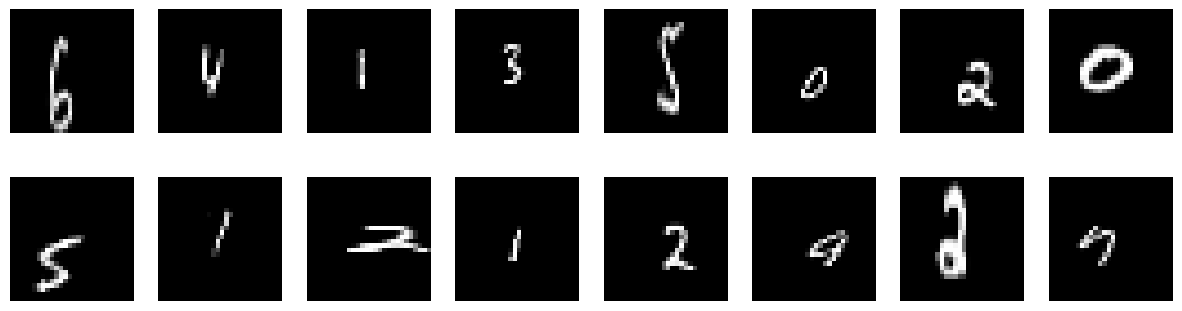

In [192]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(15,4))
ax = ax.ravel()
for i in range(16):
	# convert to unsigned integers
	image = next(aug_iter)[0]
	# plot image
	ax[i].imshow(image, cmap='gray')
	ax[i].axis('off')

In [147]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        # layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),x``
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(40, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_13 (Dropout)        (None, 1600)            

In [148]:
batch_size = 128
epochs = 70

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(datagen.flow(x_train,y_train,
                                       seed=27,
                                       shuffle=True), batch_size=batch_size, epochs=epochs, validation_data = (x_test, y_test))

Epoch 1/70
1875/1875 [==============================] - 16s 8ms/step - loss: 1.1516 - accuracy: 0.6114 - val_loss: 0.8190 - val_accuracy: 0.7751
Epoch 2/70
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6029 - accuracy: 0.8067 - val_loss: 0.5229 - val_accuracy: 0.8514
Epoch 3/70
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4849 - accuracy: 0.8461 - val_loss: 0.4361 - val_accuracy: 0.8714
Epoch 4/70
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4302 - accuracy: 0.8647 - val_loss: 0.3312 - val_accuracy: 0.9057
Epoch 5/70
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3937 - accuracy: 0.8763 - val_loss: 0.5427 - val_accuracy: 0.8326
Epoch 6/70
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3660 - accuracy: 0.8851 - val_loss: 0.4264 - val_accuracy: 0.8856
Epoch 7/70
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3449 - accuracy: 0.8902 - val_loss: 0.4377 - val_ac

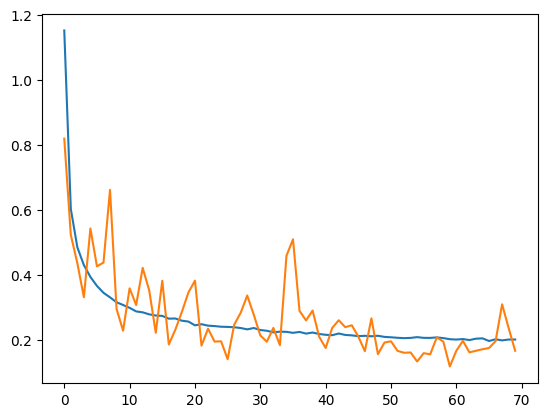

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

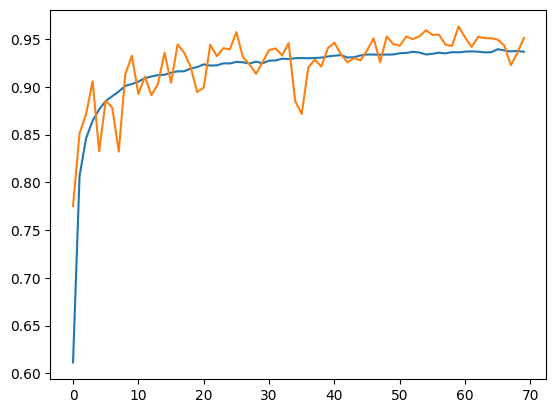

In [150]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [151]:
# from keras.models import save_model

# # you can write whatever you desire instead of 'my_model'
# # model = Your trained model
# model.save('my_model')